<a href="https://colab.research.google.com/github/tomsoch/PDB_analyser/blob/main/Project_PDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project PDB**

**Application:**

1. Downloads any PDB file containing the protein to a directory on the Google Drive, based on the code provided by the user;
2. Filters out the temperature factors for C$\alpha$ atoms of the A chain along with the numbers of amino acid residues
3. Counts the range of temperature factors (minimum and maximum), mean and standard deviation
4. Asks the user to enter a threshold that will be used to filter out the highest temperature factors, and then prints the numbers of residues for which the temperature factors of C$\alpha$ (CA) atoms are above the given threshold,
5. Plots the values of temperature factors for C$\alpha$ atoms as a function of the residue number and marks the values of temperature factors higher than the threshold specified by the user.




In [ ]:
#tested for proteins: 1lys, 1e7w, 6lyz
import requests                     
import re 
import os 
import numpy as np
import statistics
import matplotlib.pyplot as plt
from google.colab import drive 
drive.mount ('/content/drive')     

Mounted at /content/drive


In [ ]:
def calculations (temp,precision):           
  print ("maximum: ", temp[len(temp)-1]) 
  print ("minimum: ", temp[0])           
  print("average value: ",round(statistics.mean(temp),precision))                  
  print("standard deviation: ",round(statistics.stdev(temp),precision))  

def print_residues(threshold,temp,amin):     
  for i in range(len(temp)):           
    if (temp[i]>threshold):                 
      temp_above.append(temp[i])        
      resid_above.append(amin[i])         
      print("Amino acid residue number: ",amin[i]) 

def show_plot(amin,temp,threshold, resid_above, temp_above):           
  amin, temp = zip(*sorted(zip(amin, temp)))                   
  plt.plot(amin, temp,'-bo', markersize=4)                      
  plt.style.use('seaborn')                                        
  plt.xlabel('Amino acid residues')                              
  plt.ylabel('Temperature factors [°C]')                           
  plt.plot(resid_above,temp_above,'ro', markersize=5)                 
  threshold_string = r"$\bf{" +"Threshold: " + str(threshold)  + " °C"+ "}$"    
  under = plt.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=8, label='Under and equal to the threshold')
  above = plt.Line2D([], [], color='red', marker='o', linestyle='None', markersize=8, label='Above the threshold')              
  thres = plt.Line2D([], [], linestyle='None', markersize=8, label=threshold_string)     
  plt.legend(title='Temperature factors for amino acid: '+ cz3,handles=[under, above, thres])        
  plt.grid(True)                                    
  plt.show()           



In [ ]:
cz1 = "/content/drive/My Drive/"                         
cz2 = ".pdb"                                           
cz3 = input("Please provide PDB code: ")                             
cz4 = "https://files.rcsb.org/download/"                   
my_file = cz1 + cz3 + cz2                                 

if not os.path.exists(my_file):                         
  url = cz4 + cz3 + cz2                                  
  r = requests.get(url, allow_redirects=True)             
  open(my_file, 'wb').write(r.content)                  

text_pdb = open(my_file, 'r').read()                    
list_title = re.findall("^TITLE.*", text_pdb, re.MULTILINE)    
list_title = [line.split() for line in list_title]    

for line in list_title: 
  print(' '.join(line))                                  

Please provide PDB code: 1lys
TITLE X-RAY STRUCTURE OF A MONOCLINIC FORM OF HEN EGG-WHITE LYSOZYME
TITLE 2 CRYSTALLIZED AT 313K. COMPARISON OF TWO INDEPENDENT MOLECULES


In [ ]:
list_atom = re.findall("^ATOM.*", text_pdb, re.MULTILINE)               
filter = ("ATOM", "CA", "A")                                              
temp = []                                                               
amin = []                                                                 
list_atom = [line.split() for line in list_atom]                      
for line in list_atom:                                                   
  if (line[0]==filter[0] and line[2]==filter[1] and line[4]==filter[2] ):  
    z= len(line)-2                                                      
    print ("amino acid residue: ",line[5],"temperature factor: ",line[(z)])                                                     
    temp.append(float(line[(z)]))                                       
    amin.append(float(line[5]))                                           
if not temp:
  print("List is empty, please check the input file")  
  for line in list_atom: print(line)
temp, amin = zip(*sorted(zip(temp, amin)))                             

amino acid residue:  1 temperature factor:  13.52
amino acid residue:  2 temperature factor:  14.70
amino acid residue:  3 temperature factor:  11.39
amino acid residue:  4 temperature factor:  16.10
amino acid residue:  5 temperature factor:  13.74
amino acid residue:  6 temperature factor:  14.08
amino acid residue:  7 temperature factor:  16.81
amino acid residue:  8 temperature factor:  13.24
amino acid residue:  9 temperature factor:  15.21
amino acid residue:  10 temperature factor:  15.05
amino acid residue:  11 temperature factor:  12.50
amino acid residue:  12 temperature factor:  12.67
amino acid residue:  13 temperature factor:  20.47
amino acid residue:  14 temperature factor:  25.31
amino acid residue:  15 temperature factor:  19.84
amino acid residue:  16 temperature factor:  20.44
amino acid residue:  17 temperature factor:  21.28
amino acid residue:  18 temperature factor:  20.04
amino acid residue:  19 temperature factor:  16.04
amino acid residue:  20 temperature fact

In [ ]:
precision = 3                             
calculations(temp,precision)                

maximum:  47.5
minimum:  3.97
average value:  16.001
standard deviation:  8.099


In [ ]:
threshold = float(input("Temperature threshold for B-factor value: ")) 
resid_above =[]                          
temp_above =[]                           

print("Amino acid residue number above the: ",threshold,"degrees sorted ascending by temperature factors: ")
print_residues(threshold,temp,amin)           

Temperature threshold for B-factor value: 25
Amino acid residue number above the:  25.0 degrees sorted ascending by temperature factors: 
Amino acid residue number:  86.0
Amino acid residue number:  45.0
Amino acid residue number:  14.0
Amino acid residue number:  125.0
Amino acid residue number:  72.0
Amino acid residue number:  100.0
Amino acid residue number:  126.0
Amino acid residue number:  48.0
Amino acid residue number:  46.0
Amino acid residue number:  71.0
Amino acid residue number:  127.0
Amino acid residue number:  47.0
Amino acid residue number:  103.0
Amino acid residue number:  101.0
Amino acid residue number:  128.0
Amino acid residue number:  102.0
Amino acid residue number:  129.0


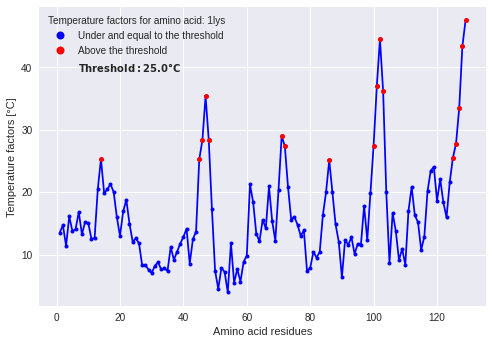

In [ ]:
show_plot(amin,temp,threshold,resid_above,temp_above) 